In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
%matplotlib inline

In [50]:
tiic=pd.read_csv('titanic.csv')
tiic.head()
tiic.shape
tiic.columns
tiic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [51]:
tiic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [52]:
tiic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

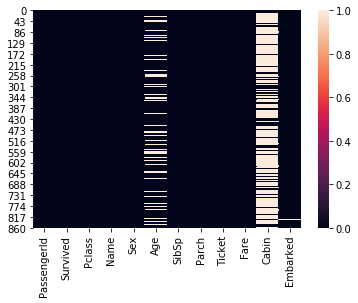

In [53]:
sb.heatmap(tiic.isnull())

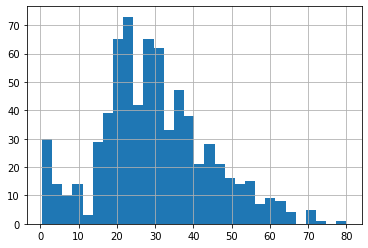

In [54]:
tiic['Age'].hist(bins=30)

In [55]:
tiic['Age'].isnull().sum()

177

In [56]:
tiic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [57]:
tiic['Pclass'].mode()

0    3
dtype: int64

In [58]:
tiic['Age'].median()

28.0

In [59]:
tiic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [65]:
tiic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [66]:
tiic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [88]:
tt=tiic.drop(['Age','Cabin','Name','Ticket'],axis=1)

In [89]:
tt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [90]:
tt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [91]:
tt['Embarked'].mode()

0    S
dtype: object

In [92]:
tt.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S


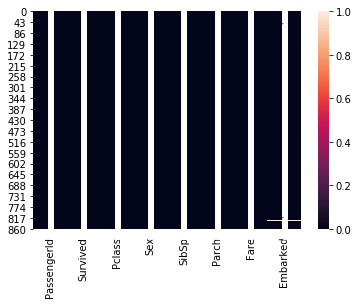

In [93]:
sb.heatmap(tt.isnull(),annot=True)

In [148]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#le.fit(tt['Sex'])
#sex=pd.DataFrame(le.transform(tt['Sex']))
#sex

In [107]:
tt.drop('Sex',axis=1,inplace=True)


In [108]:
tt.head(4)

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,7.2500,S
1,2,1,1,1,0,71.2833,C
2,3,1,3,0,0,7.9250,S
3,4,1,1,1,0,53.1000,S


In [109]:
tt.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,7.2500,S
1,2,1,1,1,0,71.2833,C
2,3,1,3,0,0,7.9250,S
3,4,1,1,1,0,53.1000,S
4,5,0,3,0,0,8.0500,S


In [112]:
tt.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked
0,1,0,3,1,0,7.2500,S
1,2,1,1,1,0,71.2833,C
2,3,1,3,0,0,7.9250,S
3,4,1,1,1,0,53.1000,S
4,5,0,3,0,0,8.0500,S


In [113]:
sex.head()

,0
0,1
1,0
2,0
3,0
4,1


In [116]:
titanicnew=pd.concat([tt,sex],axis=1)

In [117]:
titanicnew.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,0
0,1,0,3,1,0,7.2500,S,1
1,2,1,1,1,0,71.2833,C,0
2,3,1,3,0,0,7.9250,S,0
3,4,1,1,1,0,53.1000,S,0
4,5,0,3,0,0,8.0500,S,1


In [120]:
titanicnew.rename(columns={0:'Sex'},inplace=True)

In [121]:
titanicnew.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,1,0,7.2500,S,1
1,2,1,1,1,0,71.2833,C,0
2,3,1,3,0,0,7.9250,S,0
3,4,1,1,1,0,53.1000,S,0
4,5,0,3,0,0,8.0500,S,1


In [122]:
titanicnew.drop(['Embarked'],axis=1,inplace=True)

In [123]:
titanicnew.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex
0,1,0,3,1,0,7.2500,1
1,2,1,1,1,0,71.2833,0
2,3,1,3,0,0,7.9250,0
3,4,1,1,1,0,53.1000,0
4,5,0,3,0,0,8.0500,1


In [125]:
xtrain=titanicnew.drop('Survived',axis=1)

In [126]:
xtrain.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Sex
0,1,3,1,0,7.2500,1
1,2,1,1,0,71.2833,0
2,3,3,0,0,7.9250,0
3,4,1,1,0,53.1000,0
4,5,3,0,0,8.0500,1


In [127]:
ytrain=titanicnew.iloc[:,1]
ytrain.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [128]:
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=.22,random_state=43)

In [140]:
import warnings
warnings.filterwarnings('ignore')

lr=LogisticRegression()
lr.fit(x_train,y_train)
predy=lr.predict(x_test)
print('accuracy is',accuracy_score(y_test,predy))
print(confusion_matrix(y_test,predy))
print(classification_report(y_test,predy))


accuracy is 0.7360406091370558
[[104  15]
 [ 37  41]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       119
           1       0.73      0.53      0.61        78

    accuracy                           0.74       197
   macro avg       0.73      0.70      0.71       197
weighted avg       0.74      0.74      0.73       197



In [141]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [142]:
sv=SVC(kernel='rbf')
final_acc=0
for rand_st in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=.22,random_state=rand_st)
    
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('for randst',rand_st,'accuracy score is ',acc)
    if acc>final_acc:
        final_acc=acc
        final_rs=rand_st
print('best acc is',final_acc,'for the random state',final_rs)

for randst 42 accuracy score is  0.6040609137055838
for randst 43 accuracy score is  0.5532994923857868
for randst 44 accuracy score is  0.6040609137055838
for randst 45 accuracy score is  0.6192893401015228
for randst 46 accuracy score is  0.5736040609137056
for randst 47 accuracy score is  0.5786802030456852
for randst 48 accuracy score is  0.583756345177665
for randst 49 accuracy score is  0.5939086294416244
for randst 50 accuracy score is  0.5380710659898477
for randst 51 accuracy score is  0.5989847715736041
for randst 52 accuracy score is  0.5939086294416244
for randst 53 accuracy score is  0.6243654822335025
for randst 54 accuracy score is  0.5939086294416244
for randst 55 accuracy score is  0.6142131979695431
for randst 56 accuracy score is  0.6294416243654822
for randst 57 accuracy score is  0.5736040609137056
for randst 58 accuracy score is  0.5888324873096447
for randst 59 accuracy score is  0.5329949238578681
for randst 60 accuracy score is  0.5939086294416244
for randst 61

In [143]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.700507614213198
[[89 36]
 [23 49]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       125
           1       0.58      0.68      0.62        72

    accuracy                           0.70       197
   macro avg       0.69      0.70      0.69       197
weighted avg       0.71      0.70      0.70       197



In [144]:
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(x_train,y_train)
predci=kn.predict(x_test)
print(accuracy_score(y_test,predci))

0.6700507614213198


In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [146]:
adb=AdaBoostClassifier(n_estimators=10,)
adb.fit(x_train,y_train)
adp=adb.predict(x_test)
print(adb.predict_proba(x_test))
print(adp)
print(accuracy_score(y_test,adp))

[[0.46174542 0.53825458]
 [0.4881033  0.5118967 ]
 [0.55611439 0.44388561]
 [0.52988557 0.47011443]
 [0.46174542 0.53825458]
 [0.98020637 0.01979363]
 [0.54614338 0.45385662]
 [0.43556374 0.56443626]
 [0.54614338 0.45385662]
 [0.43556374 0.56443626]
 [0.4881033  0.5118967 ]
 [0.5198341  0.4801659 ]
 [0.5198341  0.4801659 ]
 [0.97004198 0.02995802]
 [0.54614338 0.45385662]
 [0.43556374 0.56443626]
 [0.50345409 0.49654591]
 [0.46174542 0.53825458]
 [0.55611439 0.44388561]
 [0.9728608  0.0271392 ]
 [0.97703487 0.02296513]
 [0.4881033  0.5118967 ]
 [0.57352925 0.42647075]
 [0.52988557 0.47011443]
 [0.5058153  0.4941847 ]
 [0.4881033  0.5118967 ]
 [0.55611439 0.44388561]
 [0.55611439 0.44388561]
 [0.45174445 0.54825555]
 [0.46174542 0.53825458]
 [0.45174445 0.54825555]
 [0.97703487 0.02296513]
 [0.45174445 0.54825555]
 [0.43556374 0.56443626]
 [0.52988557 0.47011443]
 [0.4881033  0.5118967 ]
 [0.50345409 0.49654591]
 [0.55611439 0.44388561]
 [0.53559102 0.46440898]
 [0.55611439 0.44388561]


In [147]:
#fitting final model


lr=LogisticRegression()
lr.fit(x_train,y_train)
predy=lr.predict(x_test)
print('accuracy is',accuracy_score(y_test,predy))
print(confusion_matrix(y_test,predy))
print(classification_report(y_test,predy))



accuracy is 0.751269035532995
[[103  22]
 [ 27  45]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       125
           1       0.67      0.62      0.65        72

    accuracy                           0.75       197
   macro avg       0.73      0.72      0.73       197
weighted avg       0.75      0.75      0.75       197

